In [133]:
import socket 
from _thread import *
import random
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import time
import sys


buffer = []
weight = [0.991,0.009]
ranges = [0,'ERROR']

tmp = 0

def threaded(router_socket, addr): 
    print('Connected by :', addr[0], ':', addr[1]) 
    count = 0
     
    while True: 
        try:
            data = router_socket.recv(1024)
            if(data.decode() == 'exit'):
                server_socket.close()

            now = time.time()

            if not data: 
                print('Disconnected by ' + addr[0],':',addr[1],"\n\n")
                break

                       
            ranges[0] = data.decode()
            datas = random.choices(ranges, weights=weight)  
            if(datas == ['1']):
                t1 = time.time()
                count = 0
                print('\n-----------------------------------------------------------\n')
            if(datas == ['ERROR']):
                count = count + 1
            
            if(datas != ['ERROR']):
                router_socket.send(data) 
                
            elif(datas == ['ERROR']):
                print("Packet dropped, sending NACK, router will resend the lost packet.")
                time.sleep(0.003)
                router_socket.send('NACK'.encode('utf-8'))      
                
            if(datas == ['1000']):
                t2 = time.time()
                print("bandwidth : ", t2-t1)
            
            print('packet received : ', datas, '  Errors Accumulated : ', count)
            time.sleep(0.003)
            buffer.append(datas)
            
        except ConnectionResetError as e:
            print('Error_Disconnected by ' + addr[0],':',) 
            break
             
    router_socket.close() 



HOST = '127.0.0.1'
PORT = 9999

server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
server_socket.bind((HOST, PORT))
server_socket.listen() 

print('Receiver server start')


while True: 
    print('waiting for packet to arrive from router... ') 
    router_socket, addr = server_socket.accept()  
    start_new_thread(threaded, (router_socket, addr)) 
    

server_socket.close()

Receiver server start
waiting for packet to arrive from router... 
Error_Disconnected by 127.0.0.1waiting for packet to arrive from router...  :

Connected by : 127.0.0.1 : 64762
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 1, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 2, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 3, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 4, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 5, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 6, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 7, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 8, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.

packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 86, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 87, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 88, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 89, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 90, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 91, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 92, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 93, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 94, 'Data']"]   Errors Accumulated :  0
packet received :  ["['127.0.0.1', 9998, '127.0.0.1', 9999, 95, 'Data']"]   Errors Accumulated :  0


OSError: [WinError 10038] 소켓 이외의 개체에 작업을 시도했습니다

packet received :  ['exit']   Errors Accumulated :  0


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_for_plot_150 = [150,150,148,149,149,150,147,149,149,149,  149,150,149,150,149,150,150,150,149,150]
dataset_for_plot_250 = [249,247,249,248,249,244,249,247,249,250,  250,250,249,246,248,247,249,249,249,247]
dataset_for_plot_450 = [444,447,446,446,446,449,446,448,446,445,  445,447,446,447,447,448,447,443,445,448]
dataset_for_plot_650 = [644,644,642,646,645,645,648,646,644,644,  648,646,648,648,645,641,642,646,644,645]
dataset_for_plot_850 = [843,844,845,843,844,842,842,845,843,846, 842,844,840,843,844,841,842,841,844,844]
dataset_for_plot_1000 = [990,995,992,991,990,988,994,994,992,991,  990,991,991,990,992,991,989,995,993,990]
 
dataset_for_plot_150 = df(dataset_for_plot_150)
dataset_for_plot_250 = df(dataset_for_plot_250)
dataset_for_plot_450 = df(dataset_for_plot_450)
dataset_for_plot_650 = df(dataset_for_plot_650)
dataset_for_plot_850 = df(dataset_for_plot_850)
dataset_for_plot_1000 = df(dataset_for_plot_1000)

dataset_for_plot = pd.concat([dataset_for_plot_150,dataset_for_plot_250,dataset_for_plot_450,dataset_for_plot_650,dataset_for_plot_850,dataset_for_plot_1000],axis=1)
dataset_for_plot.columns=(['150 packets','250 packets','450 packets','650 packets','850 packets','1000 packets'])
dataset_for_plot.index=(['1st', '2nd', '3rd', '4th','5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th','16th','17th','18th','19th','20th'])

dataset_for_plot = df(dataset_for_plot)
d1 = np.mean(dataset_for_plot_150)
d2 = np.mean(dataset_for_plot_250)
d3 = np.mean(dataset_for_plot_450)
d4 = np.mean(dataset_for_plot_650)
d5 = np.mean(dataset_for_plot_850)
d6 = np.mean(dataset_for_plot_1000)
d1_6 = [d1,d2,d3,d4,d5,d6]

dataset_for_plot.loc['Mean']=[float(d1),float(d2),float(d3),float(d4),float(d5),float(d6)]
dataset_for_plot.loc['Success percentage(%)']=[round(float(d1)/150 * 100,2),round(float(d2)/250 * 100,2),round(float(d3)/450* 100,2),round(float(d4)/650 * 100,2),round(float(d5)/850 * 100,2),round(float(d6)/1000 * 100,2)]

    

dataset_for_plot

,150 packets,250 packets,450 packets,650 packets,850 packets,1000 packets
1st,150.00,249.00,444.00,644.00,843.00,990.00
2nd,150.00,247.00,447.00,644.00,844.00,995.00
3rd,148.00,249.00,446.00,642.00,845.00,992.00
4th,149.00,248.00,446.00,646.00,843.00,991.00
5th,149.00,249.00,446.00,645.00,844.00,990.00
6th,150.00,244.00,449.00,645.00,842.00,988.00
7th,147.00,249.00,446.00,648.00,842.00,994.00
8th,149.00,247.00,448.00,646.00,845.00,994.00
9th,149.00,249.00,446.00,644.00,843.00,992.00
10th,149.00,250.00,445.00,644.00,846.00,991.00


Error_Disconnected by 127.0.0.1 :


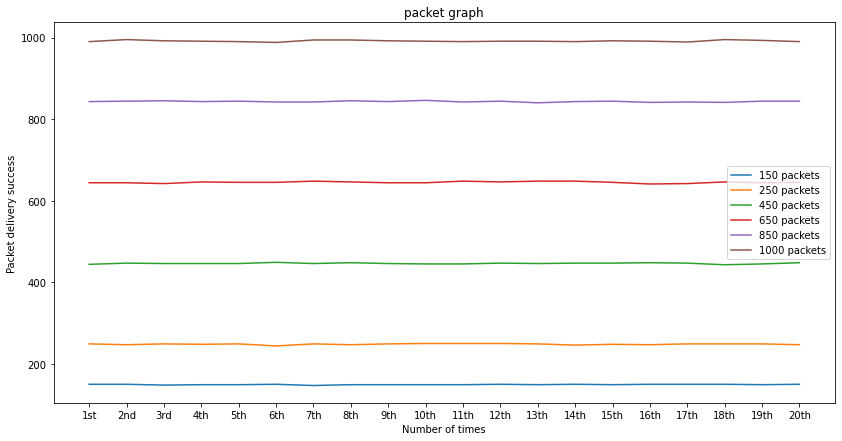

In [109]:
plt.figure(figsize=(14,7))

plt.title("packet graph")
plt.plot(dataset_for_plot.iloc[:20,0],label='150 packets')
plt.plot(dataset_for_plot.iloc[:20,1],label='250 packets')
plt.plot(dataset_for_plot.iloc[:20,2],label='450 packets')
plt.plot(dataset_for_plot.iloc[:20,3],label='650 packets')
plt.plot(dataset_for_plot.iloc[:20,4],label='850 packets')
plt.plot(dataset_for_plot.iloc[:20,5],label='1000 packets')
plt.xlabel("Number of times")
plt.ylabel("Packet delivery success")

plt.legend()
plt.show()


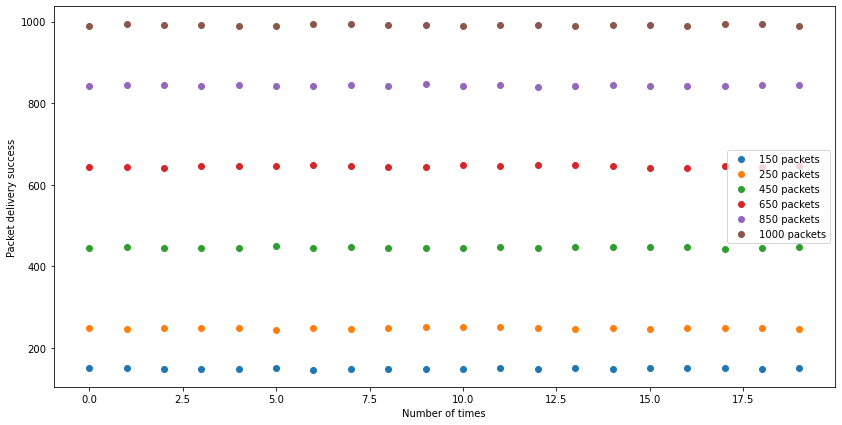

In [85]:
plt.figure(figsize=(14,7))
x = np.arange(20)

plt.scatter(x,dataset_for_plot.iloc[:20,0],label='150 packets')
plt.scatter(x,dataset_for_plot.iloc[:20,1],label='250 packets')
plt.scatter(x,dataset_for_plot.iloc[:20,2],label='450 packets')
plt.scatter(x,dataset_for_plot.iloc[:20,3],label='650 packets')
plt.scatter(x,dataset_for_plot.iloc[:20,4],label='850 packets')
plt.scatter(x,dataset_for_plot.iloc[:20,5],label='1000 packets')
plt.xlabel("Number of times")
plt.ylabel("Packet delivery success")

plt.legend()
plt.show()


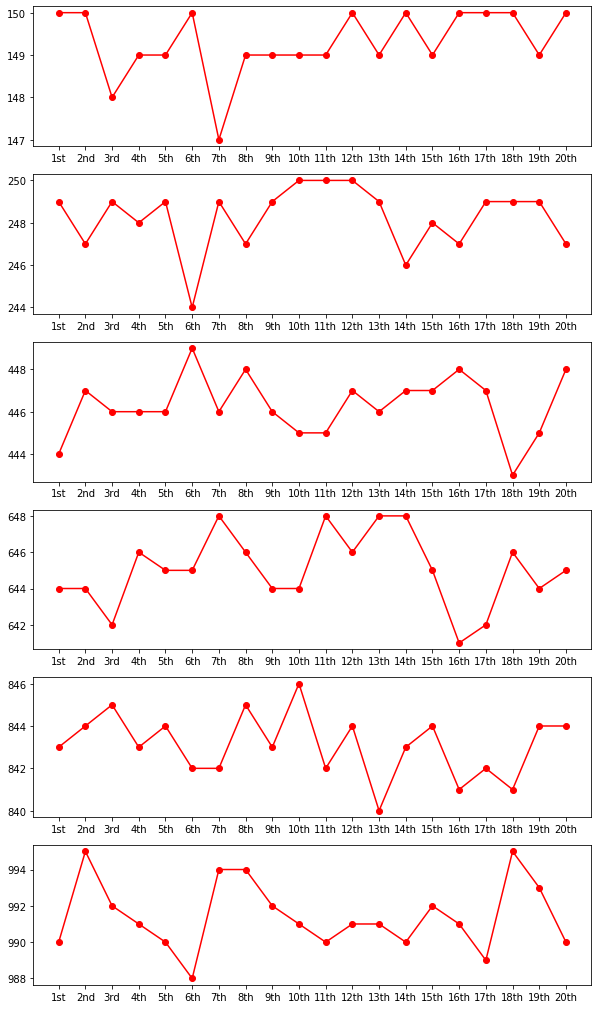

Error_Disconnected by 127.0.0.1 :


In [119]:
fig = plt.figure(figsize=(10,18))
mod = sys.modules[__name__]

x=[0,1,2,3,4,5,6,7]

for i in range(1,7):
    setattr(mod, 'ax_{}'.format(i),fig.add_subplot(6, 1, i))

for j in range(1,7):
    globals()['ax_{}'.format(j)].plot(dataset_for_plot.iloc[:20,j-1],c='r', marker='o')

plt.show()

No handles with labels found to put in legend.


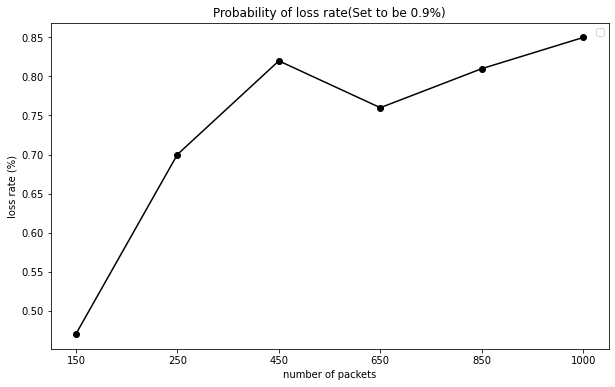

In [130]:
prob = [100-99.53,100-99.30, 100-99.18, 100-99.24, 100-99.19, 100-99.15]
prob = df(prob)

prob.index=(['150','250','450','650','850','1000'])

plt.figure(figsize=(10,6))
plt.plot(prob,marker='o',c='black')
plt.title('Probability of loss rate(Set to be 0.9%)')
plt.ylabel('loss rate (%)')
plt.xlabel('number of packets')
plt.legend()
plt.show()